In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats
import os


Import data

In [2]:
numbers_controls = range(19, 52)

# Dictionary to store DataFrames
dataframes_mid = {}

for i in numbers_controls:
    sub_control = f"sub-control{i:03d}"
    filename = f"featqueryreport_{sub_control}_ses-midcycle_OFG.txt"
    filepath = os.path.join("C:\\Users\\beama\\OneDrive\\Documents\\uni\\4 ano\\Tese\\plots\\all_VISOFG_reports", filename)
    if os.path.exists(filepath):
        dataframes_mid[f"control{i}_ses-midcycle"] = pd.read_csv(filepath, sep=" ", header=None)
        #print(f"Successfully read {filename}. Shape: {dataframes_mid[f'control{i}_{phase}'].shape}")
    else:
        #print(f"File {filename} not found. Skipping...")
        pass

print(len(dataframes_mid))

# Dictionary to store DataFrames
dataframes_premens = {}

for i in numbers_controls:
    sub_control = f"sub-control{i:03d}"
    filename = f"featqueryreport_{sub_control}_ses-premenstrual_OFG.txt"
    filepath = os.path.join("C:\\Users\\beama\\OneDrive\\Documents\\uni\\4 ano\\Tese\\plots\\all_VISOFG_reports", filename)
    if os.path.exists(filepath):
        dataframes_premens[f"control{i}_ses-premenstrual"] = pd.read_csv(filepath, sep=" ", header=None)
        #print(f"Successfully read {filename}. Shape: {dataframes_premens[f'control{i}_{phase}'].shape}")
    else:
        #print(f"File {filename} not found. Skipping...")
        pass

print(len(dataframes_premens))

15
15


In [3]:
numbers_patients = range(1, 53)

dataframes_int = {}

for i in numbers_patients:
    sub_patient = f"sub-patient{i:03d}"
    filename = f"featqueryreport_{sub_patient}_ses-interictal_OFG.txt"
    filepath = os.path.join("C:\\Users\\beama\\OneDrive\\Documents\\uni\\4 ano\\Tese\\plots\\all_VISOFG_reports", filename)
    if os.path.exists(filepath):
        dataframes_int[f"patient{i}_ses-interictal"] = pd.read_csv(filepath, sep=" ", header=None)
        #print(f"Successfully read {filename}. Shape: {dataframes_int[f'patient{i}_{phase}'].shape}")
    else:
        #print(f"File {filename} not found. Skipping...")
        pass

print(len(dataframes_int))

# Dictionary to store DataFrames
dataframes_preictal = {}

for i in numbers_patients:
    sub_patient = f"sub-patient{i:03d}"
    filename = f"featqueryreport_{sub_patient}_ses-preictal_OFG.txt"
    filepath = os.path.join("C:\\Users\\beama\\OneDrive\\Documents\\uni\\4 ano\\Tese\\plots\\all_VISOFG_reports", filename)
    if os.path.exists(filepath):
        dataframes_preictal[f"patient{i}_ses-preictal"] = pd.read_csv(filepath, sep=" ", header=None)
        #print(f"Successfully read {filename}. Shape: {dataframes_preictal[f'patient{i}_{phase}'].shape}")
    else:
        #print(f"File {filename} not found. Skipping...")
        pass

print(len(dataframes_preictal))

# Dictionary to store DataFrames
dataframes_ictal = {}

for i in numbers_patients:
    sub_patient = f"sub-patient{i:03d}"
    filename = f"featqueryreport_{sub_patient}_ses-ictal_OFG.txt"
    filepath = os.path.join("C:\\Users\\beama\\OneDrive\\Documents\\uni\\4 ano\\Tese\\plots\\all_VISOFG_reports", filename)
    if os.path.exists(filepath):
        dataframes_ictal[f"patient{i}_ses-ictal"] = pd.read_csv(filepath, sep=" ", header=None)
        #print(f"Successfully read {filename}. Shape: {dataframes_ictal[f'patient{i}_{phase}'].shape}")
    else:
        #print(f"File {filename} not found. Skipping...")
        pass

print(len(dataframes_ictal))

# Dictionary to store DataFrames
dataframes_postictal = {}

for i in numbers_patients:
    sub_patient = f"sub-patient{i:03d}"
    filename = f"featqueryreport_{sub_patient}_ses-postictal_OFG.txt"
    filepath = os.path.join("C:\\Users\\beama\\OneDrive\\Documents\\uni\\4 ano\\Tese\\plots\\all_VISOFG_reports", filename)
    if os.path.exists(filepath):
        dataframes_postictal[f"patient{i}_ses-postictal"] = pd.read_csv(filepath, sep=" ", header=None)
        #print(f"Successfully read {filename}. Shape: {dataframes_postictal[f'patient{i}_{phase}'].shape}")
    else:
        #print(f"File {filename} not found. Skipping...")
        pass

print(len(dataframes_postictal))

13
12
14
13


First plots (COPE8) and functions

In [4]:
def extract_values(dataframes, iloc_position):
    extracted_values = []
    for key in dataframes:
        extracted_values.append(dataframes[key].iloc[iloc_position[0], iloc_position[1]])
    return extracted_values

midcycle = extract_values(dataframes_mid, (0, 5))
premenstrual = extract_values(dataframes_premens, (0, 5))
interictal = extract_values(dataframes_int, (0, 5))
preictal = extract_values(dataframes_preictal, (0, 5))
ictal = extract_values(dataframes_ictal, (0, 5))
postictal = extract_values(dataframes_postictal, (0, 5))

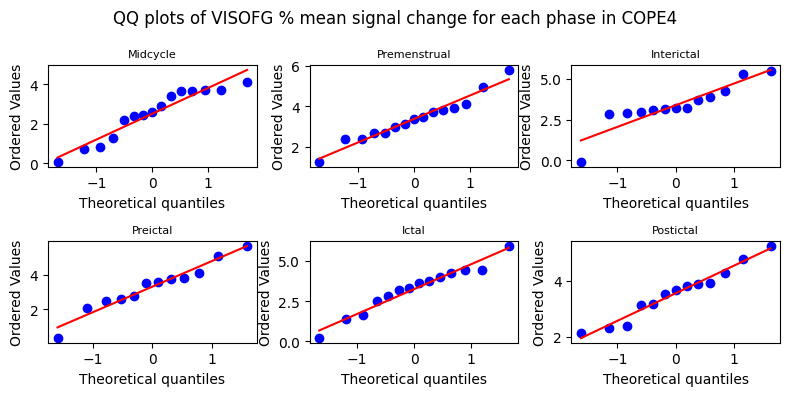

In [5]:
# qq plot of each phase

fig, axs = plt.subplots(2, 3, figsize=(8, 4))
fig.suptitle("QQ plots of VISOFG % mean signal change for each phase in COPE4")

stats.probplot(midcycle, dist="norm", plot=axs[0, 0])
axs[0, 0].set_title("Midcycle", fontsize=8)

stats.probplot(premenstrual, dist="norm", plot=axs[0, 1])
axs[0, 1].set_title("Premenstrual", fontsize=8)

stats.probplot(interictal, dist="norm", plot=axs[0, 2])
axs[0, 2].set_title("Interictal", fontsize=8)

stats.probplot(preictal, dist="norm", plot=axs[1, 0])
axs[1, 0].set_title("Preictal", fontsize=8)

stats.probplot(ictal, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title("Ictal", fontsize=8)

stats.probplot(postictal, dist="norm", plot=axs[1, 2])
axs[1, 2].set_title("Postictal", fontsize=8)

plt.tight_layout()
plt.show()

In [6]:
## sahpiro-wilk test for normality

midcycle_shapiro = stats.shapiro(midcycle)
premenstrual_shapiro = stats.shapiro(premenstrual)
interictal_shapiro = stats.shapiro(interictal)
preictal_shapiro = stats.shapiro(preictal)
ictal_shapiro = stats.shapiro(ictal)
postictal_shapiro = stats.shapiro(postictal)

print(f"Midcycle: {midcycle_shapiro}")
print(f"Premenstrual: {premenstrual_shapiro}")
print(f"Interictal: {interictal_shapiro}")
print(f"Preictal: {preictal_shapiro}")
print(f"Ictal: {ictal_shapiro}")
print(f"Postictal: {postictal_shapiro}")


Midcycle: ShapiroResult(statistic=0.9111320447999874, pvalue=0.14093173263791597)
Premenstrual: ShapiroResult(statistic=0.9729789990173238, pvalue=0.899456924405315)
Interictal: ShapiroResult(statistic=0.8526695310967634, pvalue=0.030876916522086177)
Preictal: ShapiroResult(statistic=0.9648539017565423, pvalue=0.8501916277750958)
Ictal: ShapiroResult(statistic=0.9705950750796752, pvalue=0.8845166478551562)
Postictal: ShapiroResult(statistic=0.9626227587853929, pvalue=0.7935811653071414)


In [7]:
# test for significance

midvsinter8 = stats.ttest_ind(midcycle, interictal)
premensvspreict8 = stats.ttest_ind(premenstrual, preictal)
premensvsict8 = stats.ttest_ind(premenstrual, ictal)
premensvspostict8 = stats.ttest_ind(premenstrual, postictal)
midvspremens8 = stats.ttest_rel(midcycle, premenstrual)

print("Midcycle vs Interictal unpaired t-test for COPE4: ",midvsinter8)
print("Premenstrual vs Preictal unpaired t-test for COPE4: ",premensvspreict8)
print("Premenstrual vs Ictal unpaired t-test for COPE4: ",premensvsict8)
print("Premenstrual vs Postictal unpaired t-test for COPE4: ",premensvspostict8)
print("Midcycle vs Premenstrual paired t-test for COPE4: ",midvspremens8)



Midcycle vs Interictal unpaired t-test for COPE4:  TtestResult(statistic=-1.7613195175008147, pvalue=0.08994200425604022, df=26.0)
Premenstrual vs Preictal unpaired t-test for COPE4:  TtestResult(statistic=0.106266686099249, pvalue=0.916218890275849, df=25.0)
Premenstrual vs Ictal unpaired t-test for COPE4:  TtestResult(statistic=0.2549990505560932, pvalue=0.8006562062363652, df=27.0)
Premenstrual vs Postictal unpaired t-test for COPE4:  TtestResult(statistic=-0.477320140524085, pvalue=0.6371222230685543, df=26.0)
Midcycle vs Premenstrual paired t-test for COPE4:  TtestResult(statistic=-2.393813717824532, pvalue=0.031236742623051303, df=14)


In [16]:
def plot_boxplot_with_significance(data, ROIname, COPEname, significance_tests):
    """
    Plot a boxplot with significance markers.

    Args:
        data (list): List of data arrays for boxplot.
        ROIname (string): Name of the ROI.
        COPEname (string): Name of the COPE.
        significance_tests (list of tuples): List of tuples containing significance test results.

    Returns:
        None
    """
    positions = [1, 2, 3, 4, 5, 6]
    phase_names = ['Midcycle', 'Premenstrual', 'Interictal', 'Preictal', 'Ictal', 'Postictal']

    # Create the boxplot with equal width
    boxprops_green = dict(color="lightgreen", facecolor="lightgreen", linewidth=2)
    boxprops_red = dict(color="lightcoral", facecolor="lightcoral", linewidth=2)
    medianprops_black = dict(color="black", linewidth=2)

    plt.boxplot(data[:-2], positions=positions[:-2], patch_artist=True, boxprops=boxprops_green, medianprops=medianprops_black, widths=0.5)
    plt.boxplot(data[-4:], positions=positions[-4:], patch_artist=True, boxprops=boxprops_red, medianprops=medianprops_black, widths=0.5)

    # Set x-axis labels
    plt.xticks(positions, phase_names, fontsize=8)

    # Add significance markers
    max_value = max(max(data[0]), max(data[1]), max(data[2]), max(data[3]), max(data[4]), max(data[5]))
    offset = 0.02

    for i, test_result in enumerate(significance_tests):
        if test_result[1].pvalue < 0.05:
            plt.hlines(max_value + offset, positions[test_result[0][0]], positions[test_result[0][1]], color='black', linewidth=2)
            plt.text((positions[test_result[0][0]] + positions[test_result[0][1]]) * 0.5, max_value + (i+1) * offset, '*', ha='center', va='bottom', fontsize=16)

    plt.ylabel('Mean % signal change')
    plt.title(f'Mean % signal change for {COPEname} in the {ROIname} (stats map)')
    plt.show()



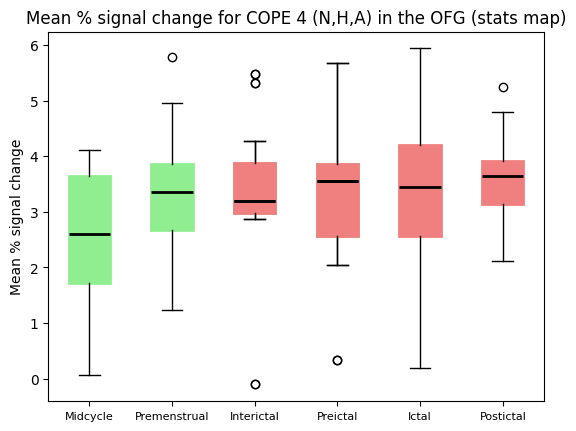

In [15]:
data = [midcycle, premenstrual, interictal, preictal, ictal, postictal]
significance_tests = [((0, 2), midvsinter8), ((1, 3), premensvspreict8), ((1, 4), premensvsict8), ((1, 5), premensvspostict8), ((0, 1), midvspremens8)] # first position in the tuple is the phases being compared (so the function knows where to draw the line), second position is the t-test result

plot_boxplot_with_significance(data, 'OFG', "COPE 4 (N,H,A)", significance_tests)


In [10]:
midcycle_thr = extract_values(dataframes_mid, (1, 5))
premenstrual_thr = extract_values(dataframes_premens, (1, 5))
interictal_thr = extract_values(dataframes_int, (1, 5))
preictal_thr = extract_values(dataframes_preictal, (1, 5))
ictal_thr = extract_values(dataframes_ictal, (1, 5))
postictal_thr = extract_values(dataframes_postictal, (1, 5))

In [11]:
def plot_boxplot(data, ROIname, COPEname):
    """
    Plot a boxplot with significance markers.

    Args:
        data (list): List of data arrays for boxplot.
        ROIname (string): Name of the ROI.

    Returns:
        None
    """
    positions = [1, 2, 3, 4, 5, 6]
    phase_names = ['Midcycle', 'Premenstrual', 'Interictal', 'Preictal', 'Ictal', 'Postictal']

    # Create the boxplot with equal width
    boxprops_green = dict(color="lightgreen", facecolor="lightgreen", linewidth=2)
    boxprops_red = dict(color="lightcoral", facecolor="lightcoral", linewidth=2)
    medianprops_black = dict(color="black", linewidth=2)

    plt.boxplot(data[:-2], positions=positions[:-2], patch_artist=True, boxprops=boxprops_green, medianprops=medianprops_black, widths=0.5)
    plt.boxplot(data[-4:], positions=positions[-4:], patch_artist=True, boxprops=boxprops_red, medianprops=medianprops_black, widths=0.5)

    # Set x-axis labels
    plt.xticks(positions, phase_names, fontsize=8)

    plt.ylabel('Mean % signal change')
    plt.title(f'Mean % signal change for {COPEname} in the {ROIname} (thresh_ztat map)')
    plt.show()

In [12]:
# significant testing 

midvsinter8_thr = stats.ttest_ind(midcycle_thr, interictal_thr)
premensvspreict8_thr = stats.ttest_ind(premenstrual_thr, preictal_thr)
premensvsict8_thr = stats.ttest_ind(premenstrual_thr, ictal_thr)
premensvspostict8_thr = stats.ttest_ind(premenstrual_thr, postictal_thr)
midvspremens8_thr = stats.ttest_rel(midcycle_thr, premenstrual_thr)

print("Midcycle vs Interictal unpaired t-test for COPE4 (thresh_zstat): ",midvsinter8_thr)
print("Premenstrual vs Preictal unpaired t-test for COPE4 (thresh_zstat): ",premensvspreict8_thr)
print("Premenstrual vs Ictal unpaired t-test for COPE4 (thresh_zstat): ",premensvsict8_thr)
print("Premenstrual vs Postictal unpaired t-test for COPE4 (thresh_zstat): ",premensvspostict8_thr)
print("Midcycle vs Premenstrual paired t-test for COPE4 (thresh_zstat): ",midvspremens8_thr)



Midcycle vs Interictal unpaired t-test for COPE4 (thresh_zstat):  TtestResult(statistic=-1.7009374051237929, pvalue=0.10088683851592672, df=26.0)
Premenstrual vs Preictal unpaired t-test for COPE4 (thresh_zstat):  TtestResult(statistic=-0.01937458942507952, pvalue=0.9846960857346713, df=25.0)
Premenstrual vs Ictal unpaired t-test for COPE4 (thresh_zstat):  TtestResult(statistic=0.32011970257329897, pvalue=0.7513417966273719, df=27.0)
Premenstrual vs Postictal unpaired t-test for COPE4 (thresh_zstat):  TtestResult(statistic=-0.4624292391027069, pvalue=0.6476202348699753, df=26.0)
Midcycle vs Premenstrual paired t-test for COPE4 (thresh_zstat):  TtestResult(statistic=-2.280381197649125, pvalue=0.03876432215736407, df=14)


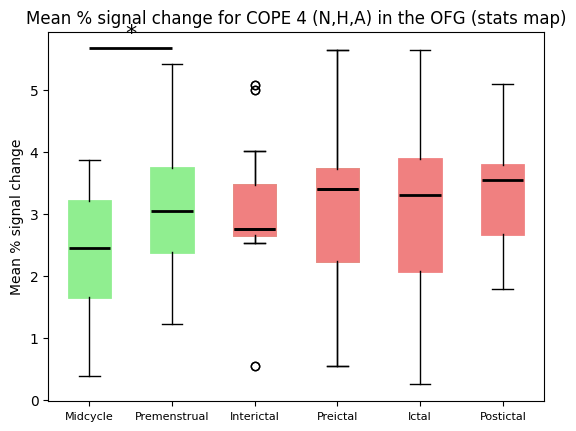

In [13]:
data = [midcycle_thr, premenstrual_thr, interictal_thr, preictal_thr, ictal_thr, postictal_thr]

significance_tests= [((0, 2), midvsinter8_thr), ((1, 3), premensvspreict8_thr), ((1, 4), premensvsict8_thr), ((1, 5), premensvspostict8_thr), ((0, 1), midvspremens8_thr)] # first position in the tuple is the phases being compared (so the function knows where to draw the line), second position is the t-test result

plot_boxplot_with_significance(data, 'OFG', "COPE 4 (N,H,A)", significance_tests)